# Housing data regression analysis

## Import packages

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib import style

# suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# # set matplotlib style
style.use('fivethirtyeight')

In [2]:
# check sklearn version
sklearn.__version__

'1.2.2'

## Load data

In [3]:
# access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load and display data
data_path = "/content/drive/MyDrive/data/boston_house_prices.csv"
data = pd.read_csv(data_path, header=1)
data.rename(columns={'MEDV': 'PRICE'}, inplace=True)
print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Dataset description

    :Number of Instances: 506
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None
    :Creator: Harrison, D. and Rubinfeld, D.L.

    This is a copy of UCI ML housing dataset found on GitHub
    https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv


### Dependent and indepentent variables

In [5]:
df = data.copy()

In [6]:
# simple linear regression
# x = rm (number of rooms)
# y = price
df_simple = df[['RM', 'PRICE']]
df_simple.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## Train and test split

In [7]:
# set up train/split selection
# by default shuffle = True (set to False when time sensitive data)

# import train/test split package
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(df_simple[['RM']].values, # X
                                                    df_simple['PRICE'].values, # y
                                                    test_size=0.2, # test split size in percentage
                                                    random_state=17)

In [8]:
# x train split check
X_train[:5]

array([[5.957],
       [8.034],
       [7.236],
       [6.185],
       [8.337]])

In [9]:
# y train split check
y_train[:5]

array([ 8.8, 50. , 36.1, 14.6, 41.7])

In [10]:
# train/test shape check
X_train.shape, X_test.shape

((404, 1), (102, 1))

## Split data visualization

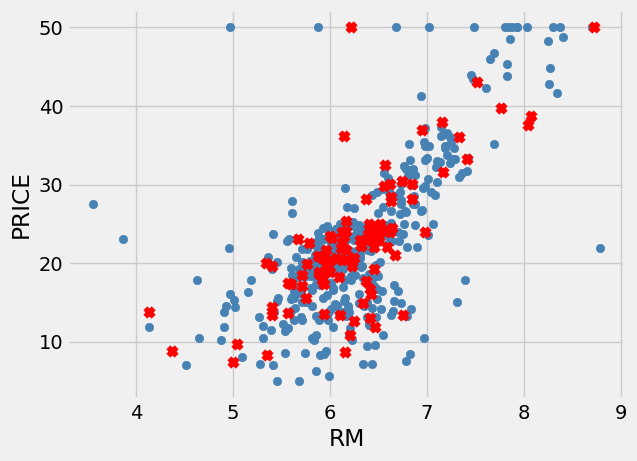

In [11]:
# plot train/test split
plt.scatter(X_train, y_train, color = 'steelblue', marker='o')
plt.scatter(X_test, y_test, color = 'red', marker='x')
plt.xlabel('RM')
plt.ylabel('PRICE');

## Simple linear regression via sklearn

In [12]:
# import linear regresion
from sklearn.linear_model import LinearRegression

# instance SLR
regr = LinearRegression()

# train the model on the training data ("find the best line")
regr.fit(X_train, y_train)

# predict on the unseen test data
pred = regr.predict(X_test)

In [13]:
# prediction data to compare vs y_test data
pred[:5]

array([26.63654061, 24.03094555, 23.32943918, 44.7299385 , 24.55024246])

In [14]:
# y_test real y price values on test data
y_test[:5]

array([30.5, 22. , 17.7, 50. , 23.3])

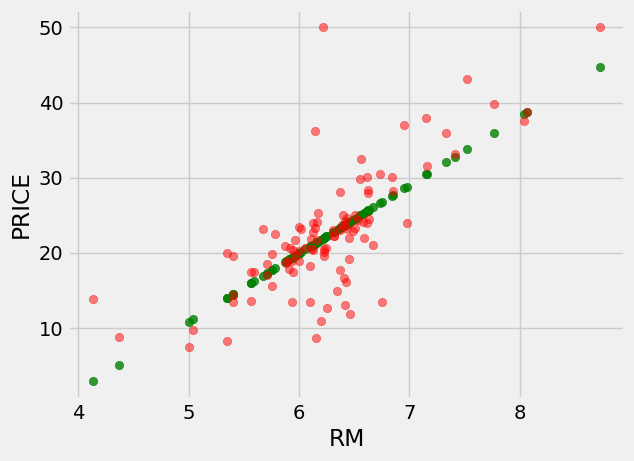

In [15]:
# plot price prediction vs actual values (y_test data)
plt.scatter(X_test, pred, color = 'green', alpha=.8)
plt.scatter(X_test, y_test, color = 'red', alpha=.5)
plt.xlabel('RM')
plt.ylabel('PRICE');

### Model performance

In [16]:
# import metrics
from sklearn import metrics

# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 Score', metrics.r2_score(y_test, pred))

MAE 3.5768737579964998
MSE 30.168823173863736
RMSE 5.492615330956987
R2 Score 0.5425677190494489


### Model performance via cross-validation

In [17]:
# how well the model generalizes to new unseen data?
# always run cross-validation on train data

# import cross_val_score
from sklearn.model_selection import cross_val_score

# cross-validation
scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
scores

array([0.5276205 , 0.09903535, 0.25248342, 0.63458114, 0.56580636])

In [18]:
# scores mean and std
np.mean(scores), np.std(scores)

(0.41590535299569575, 0.2048819238378288)

### Regression plot train/test data

In [19]:
# helper code from ML Constructor Learning course
def plot_regression(X_train, X_test, y_train, y_test, predictions, plot_title):

    # combine and sort x_test and predictions lists
    zipped = sorted(zip(X_test, predictions))

    # extract variables from list to plot
    X_test_sorted, y_pred_sorted = zip(*zipped)

    # create plot
    plt.scatter(X_train, y_train, color = 'blue', label='Train')
    plt.scatter(X_test, y_test, color = 'red', label='Test')
    plt.plot(X_test_sorted, y_pred_sorted, color = 'black', label='Preds')
    plt.title(plot_title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend();

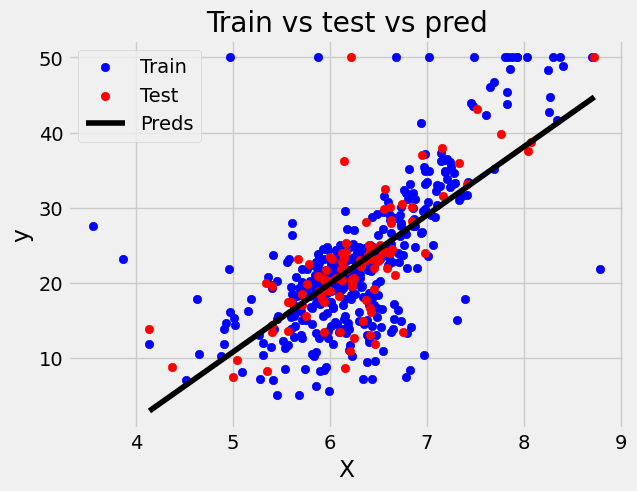

In [20]:
# plot
plot_regression(
    X_train,
    X_test,
    y_train,
    y_test,
    pred,
    "Train vs test vs pred",
)

## Polynomial regression



In [21]:
# same train/test split previously used
# create new input features by raising the original features to different powers
# the goal is to capture more complex relationships between variables

# import polynomial linear regression
from sklearn.preprocessing import PolynomialFeatures

# initialize (3 degrees)
poly_feat3 = PolynomialFeatures(degree=3, include_bias=False)

# fit and transform
X_poly3_train = poly_feat3.fit_transform(X_train)
X_poly3_test = poly_feat3.fit_transform(X_test) # .transform also will give same results

X_poly3_train[:5]

array([[  5.957     ,  35.485849  , 211.38920249],
       [  8.034     ,  64.545156  , 518.5557833 ],
       [  7.236     ,  52.359696  , 378.87476026],
       [  6.185     ,  38.254225  , 236.60238162],
       [  8.337     ,  69.505569  , 579.46792875]])

In [22]:
X_poly3_test[:5]

array([[  6.739     ,  45.414121  , 306.04576142],
       [  6.453     ,  41.641209  , 268.71072168],
       [  6.376     ,  40.653376  , 259.20592538],
       [  8.725     ,  76.125625  , 664.19607812],
       [  6.51      ,  42.3801    , 275.894451  ]])

### Train model

In [23]:
# train model
regr2 = LinearRegression()
regr2.fit(X_poly3_train, y_train)

# predict
pred2 = regr2.predict(X_poly3_test)

### Model performance

In [24]:
# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred2))
print('MSE', metrics.mean_squared_error(y_test, pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 Score', metrics.r2_score(y_test, pred2))

MAE 3.7495422875050854
MSE 30.431073865394517
RMSE 5.51643670002607
R2 Score 0.538591364674721


## Polynomial regression with scaling

In [25]:
# same train/test PolynomialFeatures fit/transformed
X_poly3_train[:5]

array([[  5.957     ,  35.485849  , 211.38920249],
       [  8.034     ,  64.545156  , 518.5557833 ],
       [  7.236     ,  52.359696  , 378.87476026],
       [  6.185     ,  38.254225  , 236.60238162],
       [  8.337     ,  69.505569  , 579.46792875]])

In [26]:
# import scaling
from sklearn.preprocessing import StandardScaler

# initialize scaling
ss = StandardScaler()

# first do fit -> compute mean and std for each feature of train data
# i.e., mean_X_poly3_train(Feature) and sigma_X_poly3_train(Feature) for each Feature
# then do transform -> scale each feature, X_train_scaled(Feature) = (X_poly3_train(Feature) - mean_X_poly3_train(Feature)) / sigma_X_poly3_train(Feature)
X_train_scaled = ss.fit_transform(X_poly3_train)

# scale test data based on learned parameters from train data (do not FIT here again!)
# X_test_scaled(Feature) = (X_poly3_test(Feature) - mean_X_poly3_train(Feature)) / sigma_X_poly3_train(Feature)
X_test_scaled = ss.transform(X_poly3_test)

### Train model

In [27]:
# train model
regr3 = LinearRegression()
regr3.fit(X_train_scaled, y_train)

# predict
pred3 = regr3.predict(X_test_scaled)

### Model performance

In [28]:
# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred3))
print('MSE', metrics.mean_squared_error(y_test, pred3))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('R2 Score', metrics.r2_score(y_test, pred3))

MAE 3.749542287504946
MSE 30.431073865394023
RMSE 5.516436700026025
R2 Score 0.5385913646747285


## Pipelines

In [29]:
# import pipeline
from sklearn.pipeline import Pipeline

# list with tuple with steps and what to do
pipeline = Pipeline(steps = [
                             # (step_name, actual_step_function\class)
                             ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                              ("modeling", LinearRegression())
                            ])


In [30]:
# access first step
pipeline[0]

# alternative
# pipeline['poly_features']

PolynomialFeatures(degree=3, include_bias=False)

### Access pipeline structure

In [31]:
# import set_config
from sklearn import set_config

# diagram
set_config(display='diagram')

# display pipeline diagram
pipeline

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('modeling', LinearRegression())])

In [32]:
# display pipeline as text
set_config(display='text')
pipeline

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('modeling', LinearRegression())])

### Train model

In [33]:
# transform and fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('modeling', LinearRegression())])

In [34]:
# predict
pred4 = pipeline.predict(X_test)

### Model performance

In [35]:
# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred4))
print('MSE', metrics.mean_squared_error(y_test, pred4))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('R2 Score', metrics.r2_score(y_test, pred4))

MAE 3.7495422875050854
MSE 30.431073865394517
RMSE 5.51643670002607
R2 Score 0.538591364674721


## Pipeline multiple steps

In [36]:
# create pipeline
# PolynomialFeatures + StandardScaler + LinearRegression
pipeline2 = Pipeline(steps = [("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                              ("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

# display pipeline
pipeline2

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [37]:
# fit
pipeline2.fit(X_train, y_train)

# predict
pred5 = pipeline2.predict(X_test)

In [38]:
# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred5))
print('MSE', metrics.mean_squared_error(y_test, pred5))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred5)))
print('R2 Score', metrics.r2_score(y_test, pred5))

MAE 3.749542287504946
MSE 30.431073865394023
RMSE 5.516436700026025
R2 Score 0.5385913646747285


## Multiple linear regression via sklearn

We will now build a linear regression model with more than 1 feature (X) to predict the house price (y)

### Load the dataset

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
# linear regression model with ++ X features to predict dependent variable y (house price)
# recap from scratch
# set up train/split selection
# by default shuffle = True

# import train/test split package
from sklearn.model_selection import train_test_split

# train/test split
# drop dependent variable y price for X
# use dependent variable y as y
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['PRICE']),
                                                    df['PRICE'],
                                                    test_size=0.2,
                                                    random_state=17)

In [41]:
# check X_train
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0,0.6790,5.957,100.0,1.8026,24,666,20.2,16.45,20.62
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88
304,0.05515,33.0,2.18,0,0.4720,7.236,41.1,4.0220,7,222,18.4,393.68,6.93
478,10.23300,0.0,18.10,0,0.6140,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47


In [42]:
# check y_train (price)
y_train.head()

418     8.8
204    50.0
304    36.1
478    14.6
232    41.7
Name: PRICE, dtype: float64

### Train model

In [43]:
# create pipeline
pipeline3 = Pipeline(steps = [("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

# display pipeline
pipeline3

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [44]:
# cross-validatin scores
scores = cross_val_score(pipeline3, X_train, y_train, cv=5, scoring='r2')
scores

array([0.73118832, 0.50454008, 0.69102965, 0.77909582, 0.79846954])

In [45]:
# fit
pipeline3.fit(X_train, y_train)

# predict
pred6 = pipeline3.predict(X_test)

### Model performance

In [46]:
# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred6))
print('MSE', metrics.mean_squared_error(y_test, pred6))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred6)))
print('R2 Score', metrics.r2_score(y_test, pred6))

MAE 3.0093478774479934
MSE 19.8135168403005
RMSE 4.451237675107958
R2 Score 0.6995791930736399


## Inspect pipeline

In [47]:
# get pipeline steps
pipeline3

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
# check what happens in a specific step
dir(pipeline3.named_steps['standard_scale'])

In [49]:
# access feature names
pipeline3[0].get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [50]:
# extract features
feats = pipeline3.named_steps['standard_scale'].get_feature_names_out()

# create dataframe
scaled_df = pd.DataFrame(pipeline3.named_steps['standard_scale'].transform(X_train),
                         columns=feats)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,7.649920,-0.464310,0.965387,-0.283221,1.059951,-0.466808,1.109652,-0.928690,1.625216,1.487643,0.795587,-3.753549,1.090369
1,-0.418349,3.633235,-1.276972,-0.283221,-1.244108,2.449923,-1.338264,0.697236,-0.657772,-1.122251,-1.709436,0.380607,-1.381982
2,-0.414501,0.959048,-1.349682,-0.283221,-0.754200,1.329292,-1.007562,0.159740,-0.315323,-1.134060,-0.024239,0.415196,-0.817550
3,0.702533,-0.464310,0.965387,-0.283221,0.490290,-0.146628,0.991030,-0.748266,1.625216,1.487643,0.795587,0.260704,0.729412
4,-0.357415,-0.464310,-0.765098,-0.283221,-0.447459,2.875426,0.149896,0.069699,-0.201174,-0.632157,-0.479697,0.329330,-1.439122


In [51]:
# get standard_scale step means
pipeline3.named_steps['standard_scale'].mean_

array([3.83187354e+00, 1.07648515e+01, 1.14613366e+01, 7.42574257e-02,
       5.58056436e-01, 6.28941337e+00, 6.91299505e+01, 3.69627772e+00,
       9.76237624e+00, 4.14059406e+02, 1.84532178e+01, 3.56108886e+02,
       1.27962129e+01])

In [52]:
# get standard_scale step var
pipeline3.named_steps['standard_scale'].var_

array([8.30193849e+01, 5.37526388e+02, 4.72887858e+01, 6.87432605e-02,
       1.30194916e-02, 5.07084173e-01, 7.73929029e+02, 4.15786385e+00,
       7.67455151e+01, 2.86813183e+04, 4.82060846e+00, 8.18845368e+03,
       5.14857062e+01])

In [53]:
# get description for specific feature
X_train['CRIM'].describe()

count    404.000000
mean       3.831874
std        9.122795
min        0.006320
25%        0.083827
50%        0.274475
75%        3.911625
max       88.976200
Name: CRIM, dtype: float64

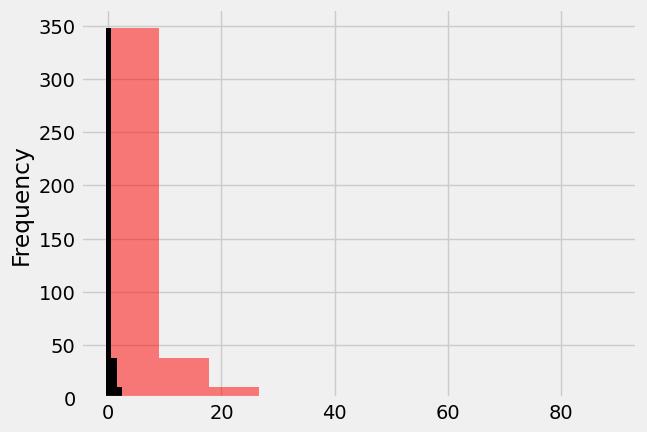

In [54]:
# plot X_train and scaled X_train
X_train['CRIM'].plot(kind='hist', alpha=0.5, color='red');
scaled_df['CRIM'].plot(kind='hist', color='black');

## Assumptions for linear regression

In [55]:
# 1. Linear relationship between indep. var. X and dep. var y
# 2. Residuals are independent (no corr. between consecutive residuals
# 3. Homoscedasticity: the residuals have constant variance at every level of X.
# 4. Normality: the residuals of the model are normally distributed.

## Multicollinearity effect

In [56]:
# 2+ Xi variables highly correlated
# issue: not able to distinguish between individual effects on y

# y = w0 + w1*X1 + w2*X2

# if there is multicollinearity the increase in X1 will increase y but also X2
# remove highly correlated features from dataset before training the model
# risk of losing reliability in determining individual features on model

### Feature correlations

In [57]:
# compute feature correlations (Xi independent variables)
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.191094,0.387283,-0.061758,0.403585,-0.200970,0.354149,-0.374757,0.611216,0.565849,0.284911,-0.369859,0.440920
ZN,-0.191094,1.000000,-0.534278,-0.029703,-0.510592,0.371164,-0.574982,0.644491,-0.298482,-0.329170,-0.396009,0.172950,-0.432818
INDUS,0.387283,-0.534278,1.000000,0.054777,0.757879,-0.399652,0.670818,-0.724577,0.576566,0.717634,0.363092,-0.342228,0.610225
CHAS,-0.061758,-0.029703,0.054777,1.000000,0.076716,0.139809,0.068686,-0.091363,-0.011715,-0.043413,-0.132850,0.041297,-0.114370
NOX,0.403585,-0.510592,0.757879,0.076716,1.000000,-0.324919,0.741742,-0.774301,0.596362,0.663097,0.183405,-0.374589,0.611067
RM,-0.200970,0.371164,-0.399652,0.139809,-0.324919,1.000000,-0.292016,0.257437,-0.206997,-0.291773,-0.371130,0.153252,-0.597194
AGE,0.354149,-0.574982,0.670818,0.068686,0.741742,-0.292016,1.000000,-0.747020,0.460340,0.531382,0.268139,-0.282854,0.627272
DIS,-0.374757,0.644491,-0.724577,-0.091363,-0.774301,0.257437,-0.747020,1.000000,-0.489385,-0.558018,-0.231657,0.294837,-0.520455
RAD,0.611216,-0.298482,0.576566,-0.011715,0.596362,-0.206997,0.460340,-0.489385,1.000000,0.905905,0.471209,-0.419047,0.480836
TAX,0.565849,-0.329170,0.717634,-0.043413,0.663097,-0.291773,0.531382,-0.558018,0.905905,1.000000,0.462861,-0.418417,0.543939


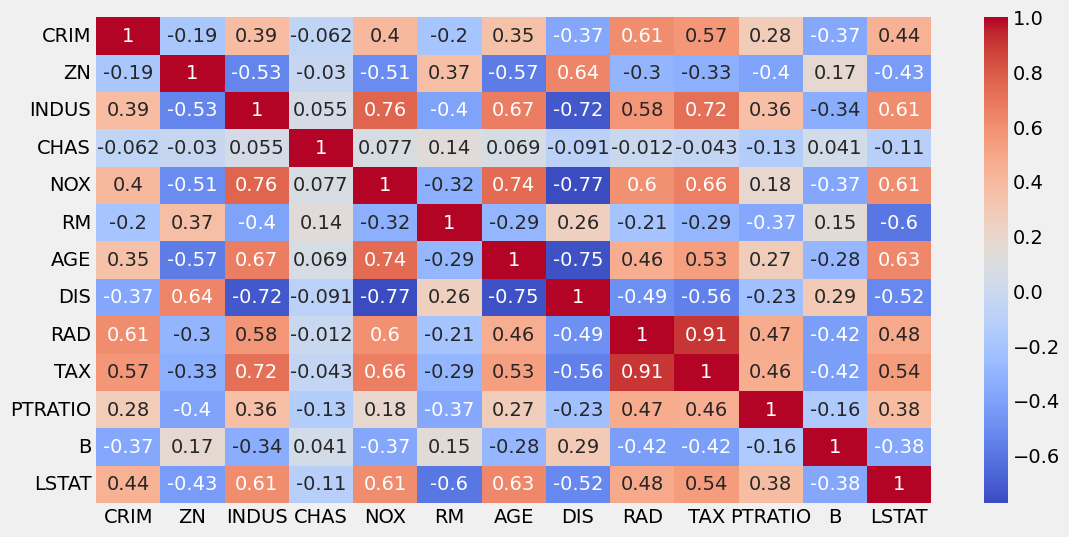

In [58]:
# visualize correlations

# import sns
import seaborn as sns

# plot correlations
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm');

### Feature correlations > 0.75

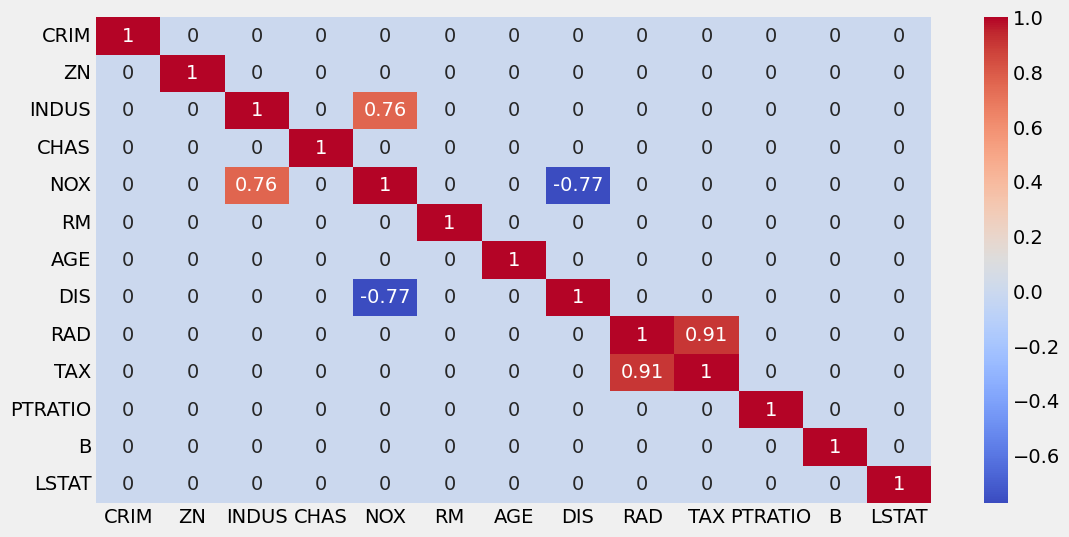

In [59]:
# correlations
r = X_train.corr()

# convert abs corr value < 0.75 into 0
r[abs(r) <= 0.75] = 0

# plot correlations
plt.figure(figsize=(12, 6))
sns.heatmap(r, annot=True, cmap='coolwarm');

### Feature selection based on strong correlations

In [60]:
# select highly correlated positive features
features_to_drop = ['NOX', 'RAD']

# drop features on train/test split
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

In [61]:
# check features
X_train_reduced.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0,5.957,100.0,1.8026,666,20.2,16.45,20.62
204,0.02009,95.0,2.68,0,8.034,31.9,5.1180,224,14.7,390.55,2.88
304,0.05515,33.0,2.18,0,7.236,41.1,4.0220,222,18.4,393.68,6.93
478,10.23300,0.0,18.10,0,6.185,96.7,2.1705,666,20.2,379.70,18.03
232,0.57529,0.0,6.20,0,8.337,73.3,3.8384,307,17.4,385.91,2.47


### Train MLR selected features

In [62]:
# create pipeline
pipeline4 = Pipeline(steps = [("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

pipeline4

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [63]:
# cross-validation scores
scores = cross_val_score(pipeline4, X_train_reduced, y_train, cv=5, scoring='r2')
scores

array([0.68916705, 0.44036822, 0.69388082, 0.78517171, 0.79104353])

In [64]:
# fit
pipeline4.fit(X_train_reduced, y_train)

# predict
pred7 = pipeline4.predict(X_test_reduced)

In [65]:
# print model evaluation (regression metrics)
print('MAE', metrics.mean_absolute_error(y_test, pred7))
print('MSE', metrics.mean_squared_error(y_test, pred7))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred7)))
print('R2 Score', metrics.r2_score(y_test, pred7))

MAE 3.0783364380004654
MSE 21.420022783344812
RMSE 4.628177047536623
R2 Score 0.6752206798610989


### Basic model interpretation

In [66]:
# get model from pipeline
model = pipeline4['modeling']
model

LinearRegression()

In [67]:
# get Xi coefficients
model.coef_

array([-0.56113897,  1.21989373, -0.42043713,  0.80046705,  2.85671057,
       -0.47918661, -2.39794141, -0.38470111, -1.52195597,  0.66083044,
       -4.16008103])

In [68]:
# dataframe with features and related coefficients
pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Coef': model.coef_
}).sort_values(by=['Coef'], ascending=False)

,Feature,Coef
4,RM,2.856711
1,ZN,1.219894
3,CHAS,0.800467
9,B,0.660830
7,TAX,-0.384701
2,INDUS,-0.420437
5,AGE,-0.479187
0,CRIM,-0.561139
8,PTRATIO,-1.521956
6,DIS,-2.397941


### Basic model conclusion

In [69]:
# most important features on model predictions

# RM: avg. n. rooms per dwelling
# LSTAT: % lower status of population
# DIS: weighted distances to five Boston employment centers
# PTRATION: schools pupil-teacher ratio